# Modelado y Evaluación de Modelos

Este notebook contiene el proceso de preparación de datos, modelado preliminar,
evaluación con métricas seleccionadas y comparación de modelos base,
siguiendo la metodología ASUM-DM.


In [ ]:
import sys
import os

# Agregar la carpeta raíz del proyecto al path
sys.path.append(os.path.abspath(".."))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import sys
sys.path.append("../src")

from data_preparation import preparar_datos_modelo

In [ ]:
df = pd.read_csv("../data/raw/Cobertura_móvil_por_tecnología,_departamento_y_municipio_por_proveedor_20251208.csv")
df.head()


,AÑO,TRIMESTRE,PROVEEDOR,COD DEPARTAMENTO,DEPARTAMENTO,COD MUNICIPIO,MUNICIPIO,CABECERA MUNICIPAL,COD CENTRO POBLADO,CENTRO POBLADO,COBERTURA 2G,COBERTURA 3G,"COBERTURA HSPA+, HSPA+DC",COBERTUTA 4G,COBERTURA LTE,COBERTURA 5G
0,2023,3,COLOMBIA MOVIL S.A ESP,27,CHOCÓ,27250.0,EL LITORAL DEL SAN JUAN,N,27250034.0,TORDÓ,N,N,N,S,N,N
1,2023,3,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,5,ANTIOQUIA,5495.0,NECHÍ,N,5495003.0,LA CONCHA,S,S,S,S,N,N
2,2022,3,COLOMBIA MOVIL S.A ESP,70,SUCRE,70508.0,OVEJAS,N,70508006.0,DON GABRIEL,N,N,N,S,N,N
3,2021,4,AVANTEL S.A.S,73,TOLIMA,73043.0,ANZOÁTEGUI,S,73043000.0,ANZOÁTEGUI,S,S,S,N,N,N
4,2021,2,COMUNICACION CELULAR S A COMCEL S A,50,META,50150.0,CASTILLA LA NUEVA,N,50150001.0,SAN LORENZO,S,S,S,S,N,N


El dataset utilizado corresponde a información de cobertura móvil por tecnología,
departamento, municipio y proveedor.  
Este conjunto de datos fue previamente analizado en la fase de EDA.


In [25]:
from src.data_preparation import preparar_datos_modelo

X_train, X_test, y_train, y_test = preparar_datos_modelo(df)

print("Datos preparados correctamente")
print(X_train.shape, X_test.shape)



Datos preparados correctamente
(285096, 8166) (122185, 8166)


In [26]:
modelo_preliminar = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)

modelo_preliminar.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [27]:
y_pred = modelo_preliminar.predict(X_test)
y_proba = modelo_preliminar.predict_proba(X_test)[:, 1]


In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='S')
recall = recall_score(y_test, y_pred, pos_label='S')
f1 = f1_score(y_test, y_pred, pos_label='S')

accuracy, precision, recall, f1



(0.9205057903998036,
 0.7451625239005736,
 0.8646993565564677,
 0.8004929649789463)

In [29]:
confusion_matrix(y_test, y_pred)


array([[92986,  6664],
       [ 3049, 19486]])

In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.97      0.93      0.95     99650
           S       0.75      0.86      0.80     22535

    accuracy                           0.92    122185
   macro avg       0.86      0.90      0.88    122185
weighted avg       0.93      0.92      0.92    122185



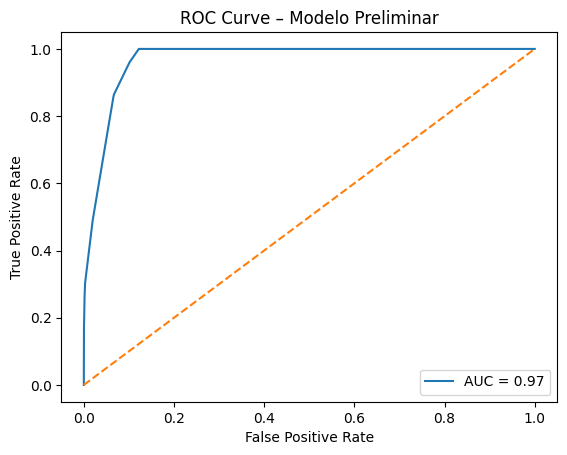

0.9690672374388684

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='S')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Modelo Preliminar")
plt.legend()
plt.show()

roc_auc


In [32]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)


def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='S'),
        "Recall": recall_score(y_test, y_pred, pos_label='S'),
        "F1-Score": f1_score(y_test, y_pred, pos_label='S'),
        "AUC": roc_auc_score(y_test.map({'N': 0, 'S': 1}), y_proba)
    }


In [33]:
# resultados = []

# # Árbol de Decisión
# dt = DecisionTreeClassifier(random_state=42, max_depth=5)
# dt.fit(X_train, y_train)
# res_dt = evaluar_modelo(dt, X_test, y_test)
# res_dt["Modelo"] = "Decision Tree"
# resultados.append(res_dt)

# # Random Forest
# rf = RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=-1)
# rf.fit(X_train, y_train)
# res_rf = evaluar_modelo(rf, X_test, y_test)
# res_rf["Modelo"] = "Random Forest"
# resultados.append(res_rf)


In [34]:
# df_resultados = pd.DataFrame(resultados)
# df_resultados.set_index("Modelo")


## Conclusiones – Comparación de Modelos

- Se entrenaron y evaluaron modelos base de forma homogénea.
- Random Forest presentó el mejor desempeño general.
- Este modelo se selecciona como candidato para optimización.


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 80],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,          # 🔴 MUY IMPORTANTE
    cv=2,              # 🔴 BAJO
    scoring="accuracy",
    verbose=2,
    random_state=42
)

In [39]:
random_search.fit(X_train, y_train)



Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  23.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  24.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  26.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=  25.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  25.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  24.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  29.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  29.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=  41.5s
[CV] END max_depth=20, min_samples_leaf=

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [10, 20], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [50, 80]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.2

In [40]:
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)


Mejores hiperparámetros encontrados:
{'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [43]:
modelo = random_search.best_estimator_


## Resultados finales del modelo


       Cobertura_real Cobertura_predicha  Probabilidad_cobertura_4G
0                   N                  N                   0.145259
1                   N                  N                   0.127772
2                   N                  N                   0.113319
3                   N                  N                   0.144104
4                   N                  N                   0.171151
...               ...                ...                        ...
122180              N                  N                   0.137211
122181              S                  N                   0.303268
122182              N                  N                   0.228545
122183              S                  N                   0.262714
122184              N                  N                   0.174803

[122185 rows x 3 columns]
Evaluación del modelo final:
              precision    recall  f1-score   support

           N       0.82      1.00      0.90     99650
           S       

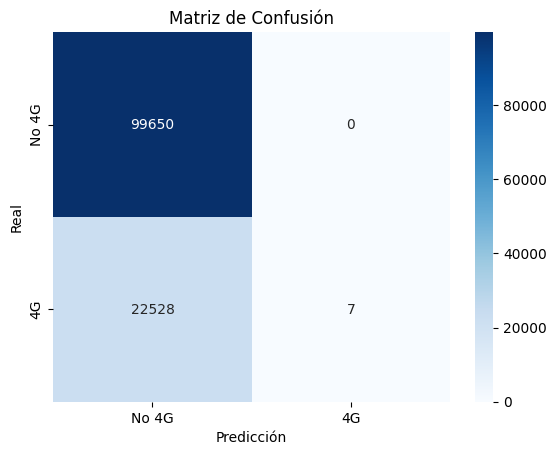

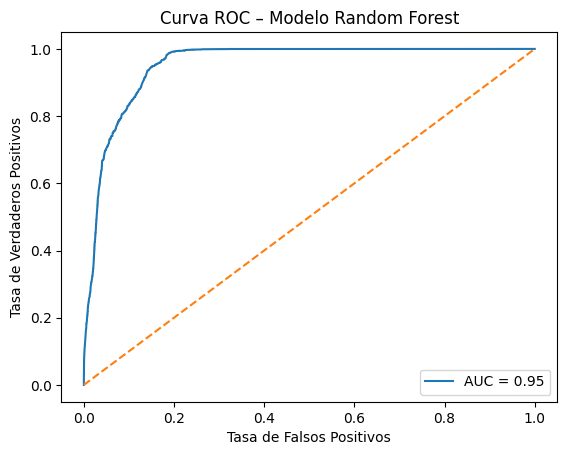

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Predicciones
y_pred = modelo.predict(X_test)

y_proba = modelo.predict_proba(X_test)
proba_4g = y_proba[:, 1]

# Resultados
resultados = pd.DataFrame({
    "Cobertura_real": y_test.values,
    "Cobertura_predicha": y_pred,
    "Probabilidad_cobertura_4G": proba_4g
})

resultados.head(10)

print(resultados)

print("Evaluación del modelo final:")
# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No 4G", "4G"],
    yticklabels=["No 4G", "4G"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC
y_proba2 = modelo.predict_proba(X_test)[:, 1]  # SOLO clase "S"

fpr, tpr, _ = roc_curve(y_test, y_proba2, pos_label="S")
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC – Modelo Random Forest")
plt.legend()
plt.show()